In [ ]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt

In [ ]:
# Importing all datasets
churn_data = pd.read_csv('/content/churn_data.csv')
customer_data = pd.read_csv('/content/customer_data.csv')
internet_data = pd.read_csv('/content/internet_data.csv')

In [ ]:
# Merging on 'customerID'
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

# Final dataframe with all predictor variables
dataset = pd.merge(df_1, internet_data, how='inner', on='customerID')

# Let's see the head of our master dataset
dataset.head()

# let's look at the statistical aspects of the dataframe
dataset.describe()

# Let's see the type of each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7042 non-null   object 
 1   tenure            7042 non-null   int64  
 2   PhoneService      7042 non-null   object 
 3   Contract          7042 non-null   object 
 4   PaperlessBilling  7042 non-null   object 
 5   PaymentMethod     7042 non-null   object 
 6   MonthlyCharges    7042 non-null   float64
 7   TotalCharges      7042 non-null   object 
 8   Churn             7042 non-null   object 
 9   gender            7042 non-null   object 
 10  SeniorCitizen     7042 non-null   int64  
 11  Partner           7042 non-null   object 
 12  Dependents        7042 non-null   object 
 13  MultipleLines     7042 non-null   object 
 14  InternetService   7042 non-null   object 
 15  OnlineSecurity    7042 non-null   object 
 16  OnlineBackup      7042 non-null   object 


In [ ]:
# Checking Null values
dataset.isnull().sum()*100/dataset.shape[0]

customerID          0.0
tenure              0.0
PhoneService        0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64

In [ ]:
#Replacing NAN values in totalcharges
dataset['TotalCharges'].describe()
dataset['TotalCharges'] = dataset['TotalCharges'].replace(' ', np.nan)
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'])

value = (dataset['TotalCharges']/dataset['MonthlyCharges']).median()*dataset['MonthlyCharges']
dataset['TotalCharges'] = value.where(dataset['TotalCharges'] == np.nan, other =dataset['TotalCharges'])
dataset['TotalCharges'].describe()

count    7031.000000
mean     2282.651714
std      2266.279660
min        18.800000
25%       401.400000
50%      1397.300000
75%      3793.050000
max      8684.800000
Name: TotalCharges, dtype: float64

In [ ]:
#Model Building
#Data Preparation
#Converting some binary variables (Yes/No) to 0/1
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

In [ ]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

In [ ]:
# Applying the function to the var list
dataset[varlist] = dataset[varlist].apply(binary_map)
dataset.head()


,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [ ]:
#For categorical variables with multiple levels, create dummy features (one-hot encoded)
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(dataset[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
dataset = pd.concat([dataset, dummy1], axis=1)
dataset.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [ ]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(dataset['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
dataset = pd.concat([dataset,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(dataset['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
dataset = pd.concat([dataset,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(dataset['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
dataset = pd.concat([dataset,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(dataset['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
dataset = pd.concat([dataset,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(dataset['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
dataset = pd.concat([dataset,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(dataset['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
dataset = pd.concat([dataset,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(dataset['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
dataset = pd.concat([dataset,sm1], axis=1)
dataset.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [ ]:
# We have created dummies for the below variables, so we can drop them
dataset = dataset.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7042 entries, 0 to 7041
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7042 non-null   object 
 1   tenure                                 7042 non-null   int64  
 2   PhoneService                           7042 non-null   int64  
 3   PaperlessBilling                       7042 non-null   int64  
 4   MonthlyCharges                         7042 non-null   float64
 5   TotalCharges                           7031 non-null   float64
 6   Churn                                  7042 non-null   int64  
 7   SeniorCitizen                          7042 non-null   int64  
 8   Partner                                7042 non-null   int64  
 9   Dependents                             7042 non-null   int64  
 10  Contract_One year                      7042 non-null   uint8  
 11  Cont

In [ ]:
# Checking for outliers in the continuous variables
num_telecom = dataset[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7042.000000,7042.000000,7042.000000,7031.000000
mean,32.366373,64.755886,0.162170,2282.651714
std,24.557955,30.088238,0.368633,2266.279660
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.400000
50%,29.000000,70.350000,0.000000,1397.300000
75%,55.000000,89.850000,0.000000,3793.050000
90%,69.000000,102.600000,1.000000,5974.300000
95%,72.000000,107.400000,1.000000,6923.800000
99%,72.000000,114.729500,1.000000,8039.940000


In [ ]:
# Checking up the missing values (column-wise)
dataset.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [ ]:
# Removing NaN TotalCharges rows
dataset = dataset[~np.isnan(dataset['TotalCharges'])]

In [ ]:
# Checking percentage of missing values after removing the missing values
round(100*(dataset.isnull().sum()/len(dataset.index)), 2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [ ]:
# Putting feature variable to X
from sklearn.model_selection import train_test_split #use 'cross_validation' instead of
                                                     #'model_selection' Executing in jupyter or spyder 
X = dataset.drop(['Churn','customerID'], axis=1)
X.head()

# Putting response variable to y
y = dataset['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

In [ ]:
X_test.shape

(2110, 30)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
3946,-0.959554,0,0,-0.205902,-0.772094,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,1
3394,-0.267828,1,0,-0.104838,-0.311706,0,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1635,-1.203693,1,1,0.173503,-0.913202,0,0,0,1,0,...,1,0,0,1,1,0,0,1,0,1
4088,-1.040933,1,0,0.294448,-0.780864,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1886,1.400452,1,1,-0.142944,0.736107,0,1,1,0,1,...,1,0,0,1,0,1,1,0,1,0


In [ ]:
#Model Building
# Logistic regression model
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4921
Model:                            GLM   Df Residuals:                     4897
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2014.5
Date:                Mon, 14 Nov 2022   Deviance:                       4029.1
Time:                        12:23:01   Pearson chi2:                 5.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.8782      1.179     -2.442      0.015      -5.189      -0.568
tenure                                   -1.5360      0.188     -8.192      0.000      -1.903      -1.168
PhoneService                              0.5693      0.585      0.974      0.330      -0.577       1.715
PaperlessBilling                          0.2325      0.089      2.608      0.009       0.058       0.407
MonthlyCharges                           -1.9069      1.158     -1.647      0.099      -4.176       0.362
TotalCharges                              0.7945      0.195      4.068      0.000       0.412       1.177
SeniorCitizen                             0.2093      0.101      2.071      0.038       0.011       0.407
Partner                                   0.1200      0.094      1.282      0.200      -0.063       0.303
Dependents                               -0.1931      0.109     -1.772      0.076      -0.407       0.020
Contract_One year                        -0.7749      0.131     -5.900      0.000      -1.032      -0.517
Contract_Two year                        -1.4247      0.211     -6.738      0.000      -1.839      -1.010
PaymentMethod_Credit card (automatic)    -0.1560      0.137     -1.141      0.254      -0.424       0.112
PaymentMethod_Electronic check            0.2539      0.113      2.254      0.024       0.033       0.475
PaymentMethod_Mailed check               -0.1331      0.139     -0.957      0.339      -0.406       0.140
gender_Male                              -0.0209      0.078     -0.268      0.789      -0.174       0.132
InternetService_Fiber optic               2.3565      0.964      2.445      0.015       0.467       4.246
InternetService_No                       -3.0045      1.315     -2.284      0.022      -5.583      -0.426
MultipleLines_No                          0.0320      0.203      0.158      0.875      -0.366       0.430
MultipleLines_Yes                         0.5373      0.391      1.375      0.169      -0.228       1.303
OnlineSecurity_No                         0.1111      0.058      1.921      0.055      -0.002       0.225
OnlineSecurity_Yes                        0.0152      0.173      0.088      0.930      -0.325       0.355
OnlineBackup_No                          -0.0225      0.054     -0.416      0.678      -0.129       0.084
OnlineBackup_Yes                          0.1489      0.172      0.866      0.386      -0.188       0.486
DeviceProtection_No                      -0.0698      0.055     -1.266      0.206      -0.178       0.038
DeviceProtection_Yes                      0.1962      0.172      1.142      0.254      -0.141       0.533
TechSupport_No                            0.1060      0.059      1.810      0.070      -0.009       0.221
TechSuppo

In [ ]:
#Feature Selection Using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)
rfe.support_

list(zip(X_train.columns, rfe.support_, rfe.ranking_))


col = X_train.columns[rfe.support_]
X_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingMovies_No'],
      dtype='object')

In [ ]:
#Adding a constant

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4921
Model:                            GLM   Df Residuals:                     4905
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2018.1
Date:                Mon, 14 Nov 2022   Deviance:                       4036.2
Time:                        12:23:03   Pearson chi2:                 5.41e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.4730      0.168    -14.763      0.000      -2.801      -2.145
tenure                            -1.5125      0.184     -8.233      0.000      -1.873      -1.152
PaperlessBilling                   0.2382      0.089      2.683      0.007       0.064       0.412
MonthlyCharges                    -0.6110      0.190     -3.210      0.001      -0.984      -0.238
TotalCharges                       0.7887      0.193      4.084      0.000       0.410       1.167
SeniorCitizen                      0.2476      0.099      2.503      0.012       0.054       0.441
Contract_One year                 -0.7844      0.130     -6.014      0.000      -1.040      -0.529
Contract_Two year                 -1.4347      0.210     -6.825      0.000      -1.847      -1.023
PaymentMethod_Electronic check     0.3524      0.083      4.267      0.000       0.191       0.514
InternetService_Fiber optic        1.3153      0.222      5.918      0.000       0.880       1.751
InternetService_No                -0.7272      0.271     -2.681      0.007      -1.259      -0.195
MultipleLines_No                  -0.2899      0.087     -3.328      0.001      -0.461      -0.119
OnlineSecurity_No                  0.3084      0.107      2.883      0.004       0.099       0.518
TechSupport_No                     0.2959      0.108      2.742      0.006       0.084       0.507
StreamingTV_Yes                    0.4114      0.112      3.658      0.000       0.191       0.632
StreamingMovies_Yes                0.4446      0.112      3.973      0.000       0.225       0.664
==================================================================================================
"""

In [ ]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
3946,1,0.343260,3946
3394,0,0.084256,3394
1635,0,0.377049,1635
4088,1,0.640515,4088
1886,0,0.004453,1886


In [ ]:
#Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
3946,1,0.343260,3946,0
3394,0,0.084256,3394,0
1635,0,0.377049,1635,0
4088,1,0.640515,4088,1
1886,0,0.004453,1886,0


In [ ]:
# Confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion_matrix)

[[3232  386]
 [ 569  734]]


In [ ]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8059337533021743


In [ ]:
#Making predictions on the test set
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_test[['tenure','MonthlyCharges','TotalCharges']])
X_test = X_test[col]
X_test.head()

X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2481    0.003584
6783    0.049747
6124    0.012263
3052    0.106545
4099    0.360621
3223    0.472730
3774    0.131134
3469    0.742500
3420    0.196133
1196    0.016613
dtype: float64

In [ ]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()


,0
2481,0.003584
6783,0.049747
6124,0.012263
3052,0.106545
4099,0.360621


In [ ]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [ ]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [ ]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Churn,CustID,0
0,0,2481,0.003584
1,0,6783,0.049747
2,0,6124,0.012263
3,0,3052,0.106545
4,0,4099,0.360621


In [ ]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,2481,0,NaN,0
1,6783,0,NaN,0
2,6124,0,NaN,0
3,3052,0,NaN,0
4,4099,0,NaN,0


In [ ]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7317535545023697

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
def PrecisionRecallCurve(y_test, y_pred, classifier):
  average_precision = average_precision_score(y_test, y_pred)
  print('Average precision-recall score: {0:0.2f}'.format(average_precision)) 
  disp = plot_precision_recall_curve(classifier, X_test, y_test)
  disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

import sklearn.metrics as metrics
def roccurve(y_test, y_pred):
  fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0,max_depth=5)

In [ ]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [ ]:
model.score(X_train,y_train)

0.8028855923592766

In [ ]:
X_test.shape

(2110, 15)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predictions)*100

73.17535545023696

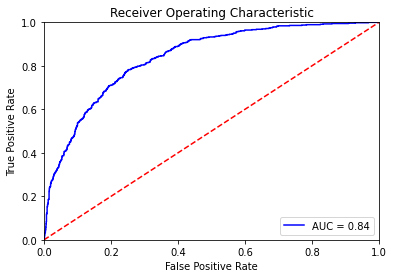

In [ ]:
roccurve(y_test,y_test_pred)

In [ ]:
#Gaussian Classifier (Naive Bayes)

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.728909952606635


Average precision-recall score: 0.45


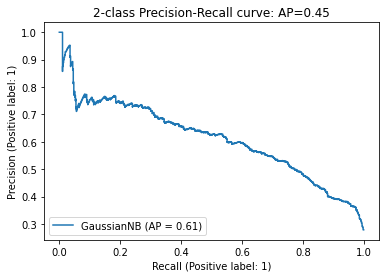

In [ ]:
PrecisionRecallCurve(y_test,y_pred,model)

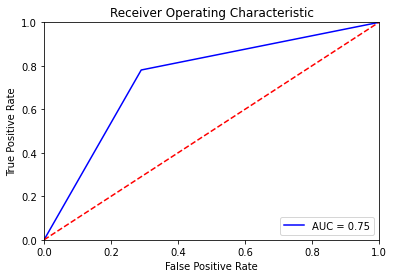

In [ ]:
roccurve(y_test,y_pred)

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7834123222748816


Average precision-recall score: 0.41


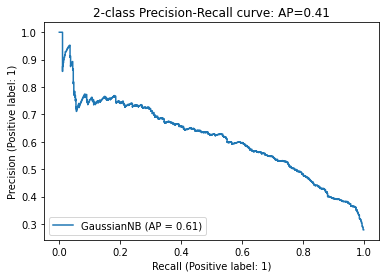

In [ ]:
PrecisionRecallCurve(y_test,y_pred,model)

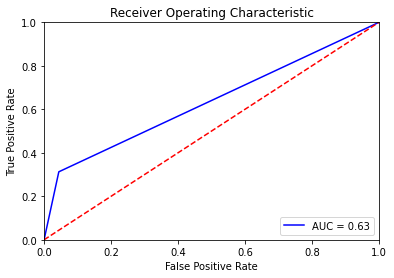

In [ ]:
roccurve(y_test,y_pred)


In [ ]:
# Polynomial Kernel SVM Classifier
from sklearn.svm import SVC
sv2 = SVC(kernel = "poly", degree=10)
sv2.fit(X_train,y_train)
y_pred = sv2.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1542    2]
 [ 566    0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1544
           1       0.00      0.00      0.00       566

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



Average precision-recall score: 0.65


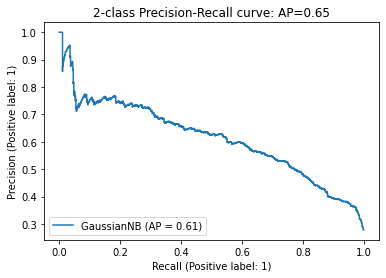

In [ ]:
PrecisionRecallCurve(y_test,y_test_pred,model)

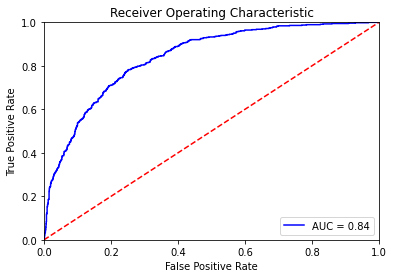

In [ ]:
roccurve(y_test,y_test_pred)


In [ ]:
# RBF Kernel SVM Classifier
from sklearn.svm import SVC
sv3 = SVC(kernel = "rbf")
sv3.fit(X_train,y_train)
y_pred = sv3.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1544    0]
 [ 566    0]]
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1544
           1       0.00      0.00      0.00       566

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



Average precision-recall score: 0.27


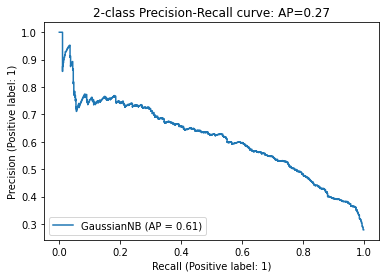

In [ ]:
PrecisionRecallCurve(y_test,y_pred,model)

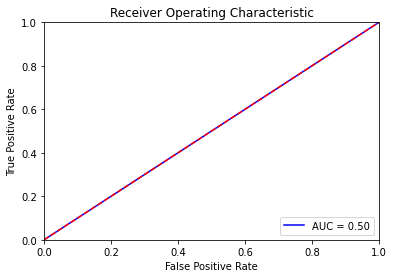

In [ ]:
roccurve(y_test,y_pred)

In [ ]:
# Sigmoid Kernel SVM Classifier
from sklearn.svm import SVC
sv4 = SVC(kernel = "sigmoid")
sv4.fit(X_train,y_train)
y_pred = sv4.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1113  431]
 [ 425  141]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1544
           1       0.25      0.25      0.25       566

    accuracy                           0.59      2110
   macro avg       0.49      0.48      0.49      2110
weighted avg       0.60      0.59      0.59      2110



Average precision-recall score: 0.26


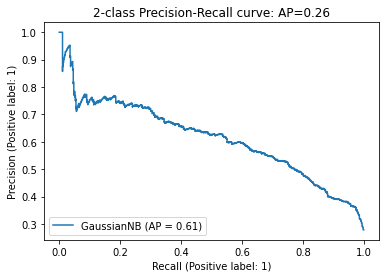

In [ ]:
PrecisionRecallCurve(y_test,y_pred,model)

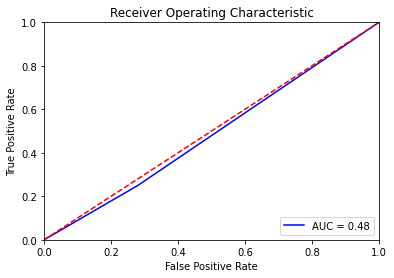

In [ ]:
roccurve(y_test,y_pred)